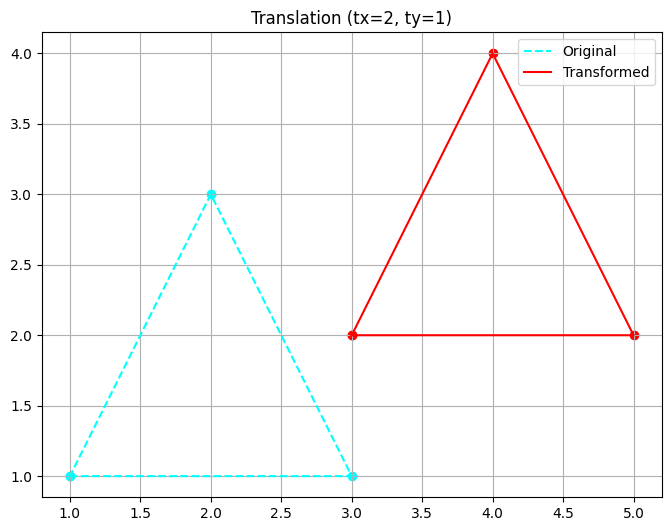

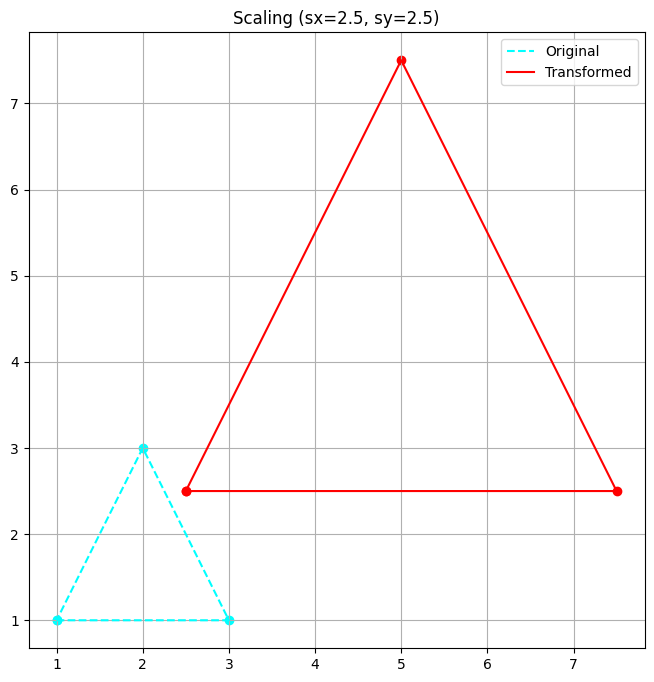

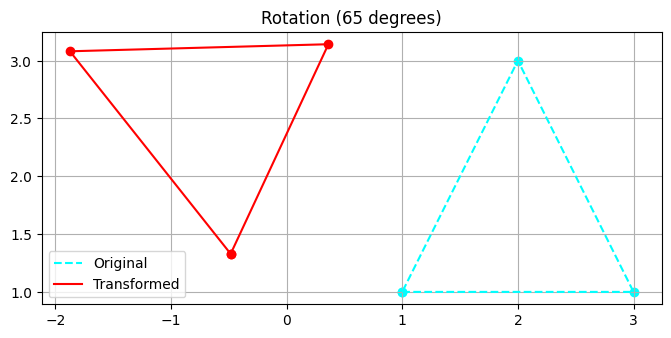

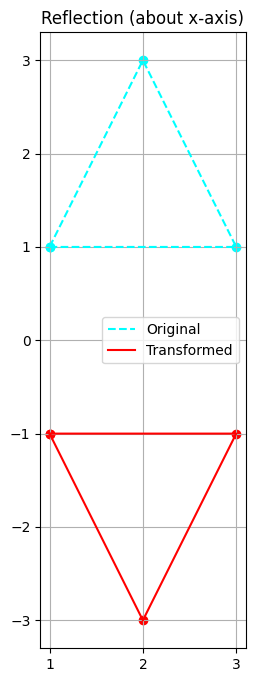

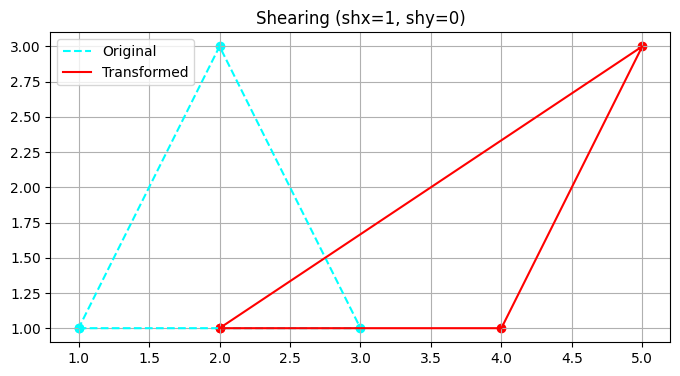

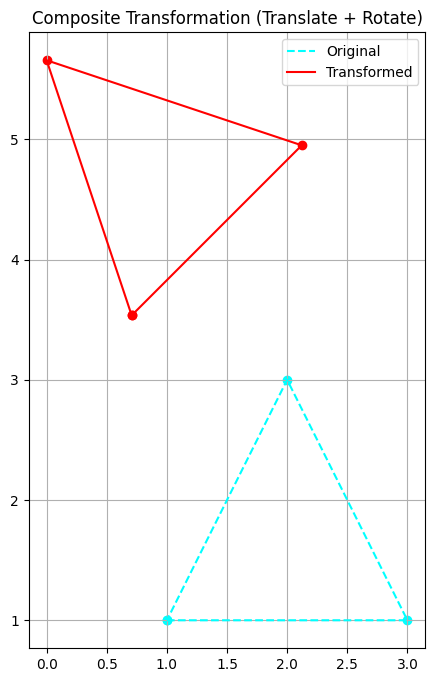

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_same_plot(original, transformed, title, label1='Original', label2='Transformed', color1='cyan', color2='red'):
    original = np.append(original, [original[0]], axis=0)
    transformed = np.append(transformed, [transformed[0]], axis=0)

    plt.figure(figsize=(8, 8))
    plt.plot(original[:, 0], original[:, 1], color=color1, label=label1, linestyle='dashed')
    plt.scatter(original[:, 0], original[:, 1], color=color1)

    plt.plot(transformed[:, 0], transformed[:, 1], color=color2, label=label2)
    plt.scatter(transformed[:, 0], transformed[:, 1], color=color2)

    plt.title(title)
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()

def translate(points, tx, ty):
    translation_matrix = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])
    return apply_transformation(points, translation_matrix)

def scale(points, sx, sy):
    scaling_matrix = np.array([[sx, 0, 0], [0, sy, 0], [0, 0, 1]])
    return apply_transformation(points, scaling_matrix)

def rotate(points, angle):
    rad = np.radians(angle)
    rotation_matrix = np.array([[np.cos(rad), -np.sin(rad), 0], [np.sin(rad), np.cos(rad), 0], [0, 0, 1]])
    return apply_transformation(points, rotation_matrix)

def reflect(points, axis='x'):
    if axis == 'x':
        reflection_matrix = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]])
    elif axis == 'y':
        reflection_matrix = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 1]])
    else:
        reflection_matrix = np.array([[-1, 0, 0], [0, -1, 0], [0, 0, 1]])
    return apply_transformation(points, reflection_matrix)

def shear(points, shx, shy):
    shear_matrix = np.array([[1, shx, 0], [shy, 1, 0], [0, 0, 1]])
    return apply_transformation(points, shear_matrix)

def apply_transformation(points, matrix):
    points_homogeneous = np.hstack((points, np.ones((points.shape[0], 1))))
    transformed_points = points_homogeneous @ matrix.T
    return transformed_points[:, :2]

#Triangle
points = np.array([[1, 1], [3, 1], [2, 3]])

#Translation
translated_points = translate(points, 2, 1)
plot_same_plot(points, translated_points, "Translation (tx=2, ty=1)")

#Scaling
scaled_points = scale(points, 2.5, 2.5)
plot_same_plot(points, scaled_points, "Scaling (sx=2.5, sy=2.5)")

#Rotation
rotated_points = rotate(points, 65)
plot_same_plot(points, rotated_points, "Rotation (65 degrees)")

#Reflection
reflected_points = reflect(points, axis='x')
plot_same_plot(points, reflected_points, "Reflection (about x-axis)")

#Shearing
sheared_points = shear(points, 1, 0)
plot_same_plot(points, sheared_points, "Shearing (shx=1, shy=0)")

# Composite transformation: translation + rotation
composite_transformed = rotate(translate(points, 2, 1), 45)
plot_same_plot(points, composite_transformed, "Composite Transformation (Translate + Rotate)")

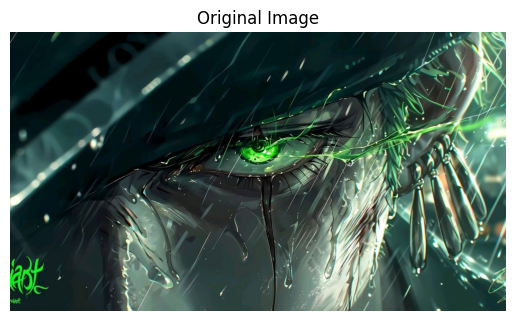

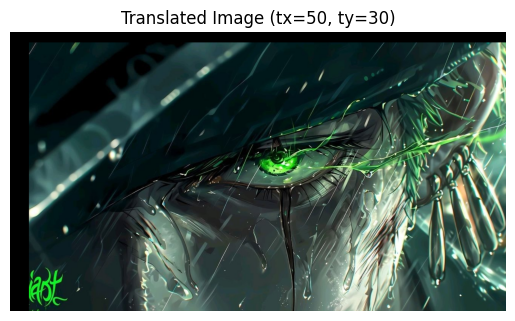

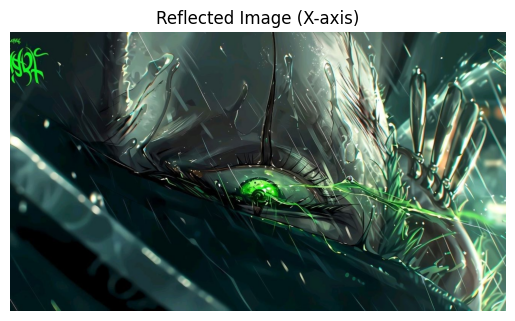

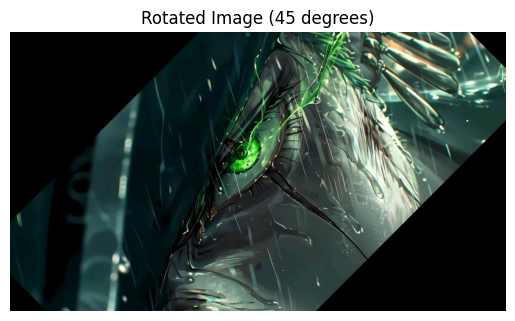

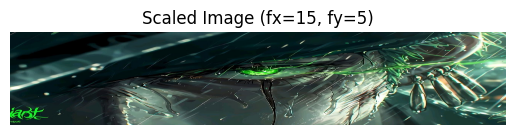

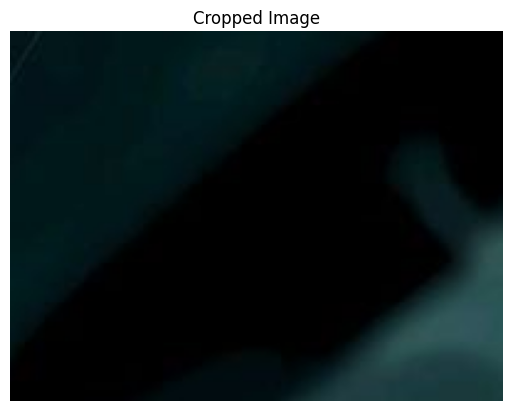

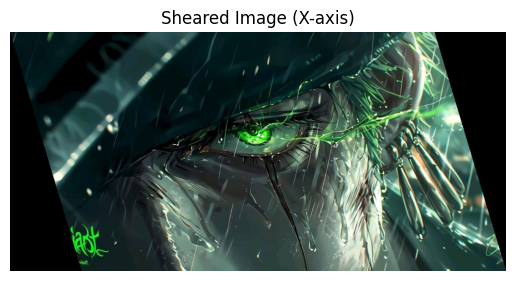

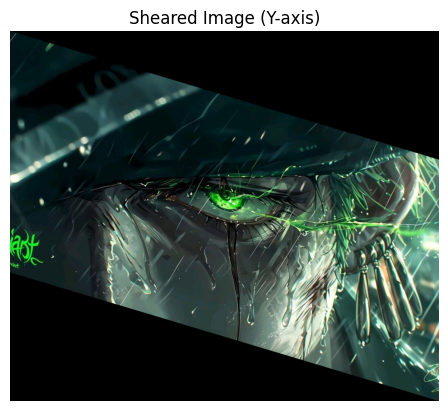

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(title, image):
    """Display image with a title."""
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load image
image = cv2.imread('/content/zoro.jpg')
if image is None:
    print("Image not found. Please check the path.")
else:
    display_image("Original Image", image)

# 1. Image Translation
def translate_image(image, tx, ty):
    rows, cols = image.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))
    return translated_image

translated_image = translate_image(image, 50, 30)
display_image("Translated Image (tx=50, ty=30)", translated_image)

# 2. Image Reflection
def reflect_image(image, axis='x'):
    if axis == 'x':
        reflected_image = cv2.flip(image, 0)
    elif axis == 'y':
        reflected_image = cv2.flip(image, 1)
    else:
        reflected_image = cv2.flip(image, -1)
    return reflected_image

reflected_image_x = reflect_image(image, 'x')
display_image("Reflected Image (X-axis)", reflected_image_x)

# 3. Image Rotation
def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

rotated_image = rotate_image(image, 45)
display_image("Rotated Image (45 degrees)", rotated_image)

# 4. Image Scaling
def scale_image(image, fx, fy):
    scaled_image = cv2.resize(image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
    return scaled_image

scaled_image = scale_image(image, 15, 5)
display_image("Scaled Image (fx=15, fy=5)", scaled_image)

# 5. Image Cropping
def crop_image(image, x, y, width, height):
    cropped_image = image[y:y+height, x:x+width]
    return cropped_image

cropped_image = crop_image(image, 50, 50, 200, 150)
display_image("Cropped Image", cropped_image)

# 6. Image Shearing in X-axis
def shear_image_x(image, shear_factor):
    rows, cols = image.shape[:2]
    shear_matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    sheared_image = cv2.warpAffine(image, shear_matrix, (cols + int(rows * shear_factor), rows))
    return sheared_image

sheared_image_x = shear_image_x(image, 0.3)
display_image("Sheared Image (X-axis)", sheared_image_x)

# 7. Image Shearing in Y-axis
def shear_image_y(image, shear_factor):
    rows, cols = image.shape[:2]
    shear_matrix = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    sheared_image = cv2.warpAffine(image, shear_matrix, (cols, rows + int(cols * shear_factor)))
    return sheared_image

sheared_image_y = shear_image_y(image, 0.3)
display_image("Sheared Image (Y-axis)", sheared_image_y)